# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

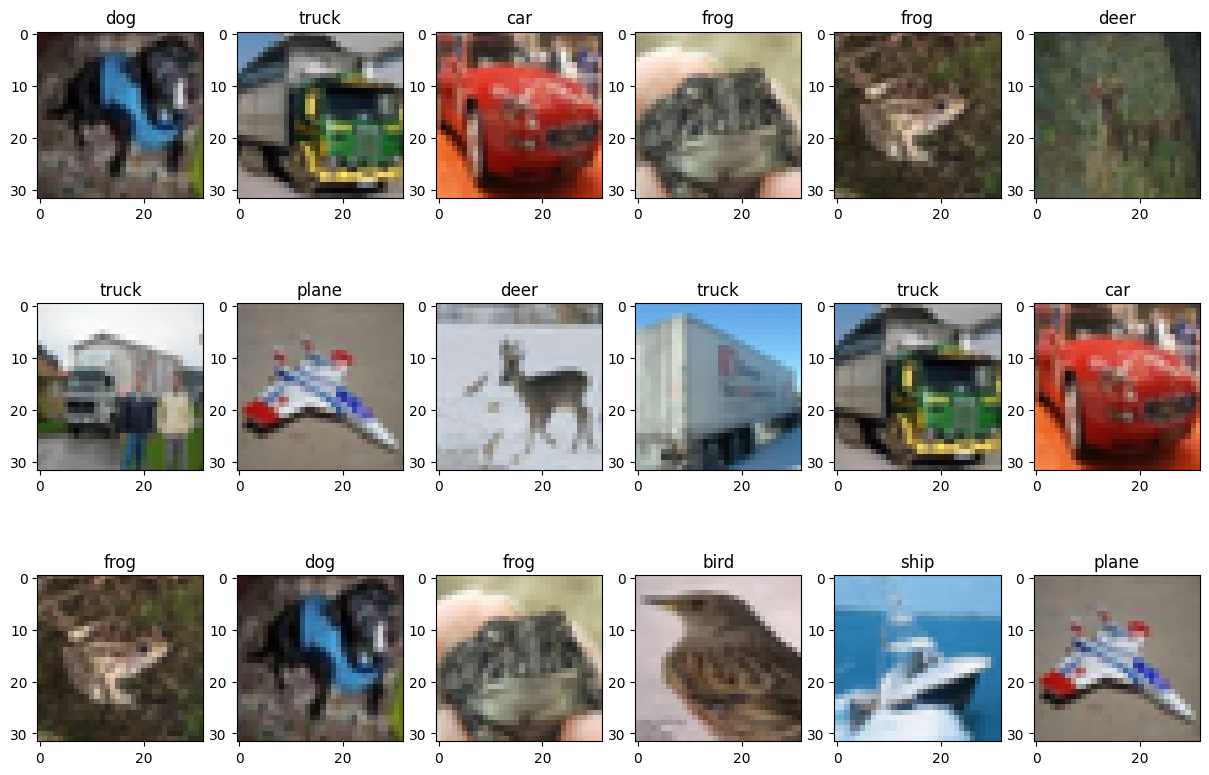

In [7]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3, 6, ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

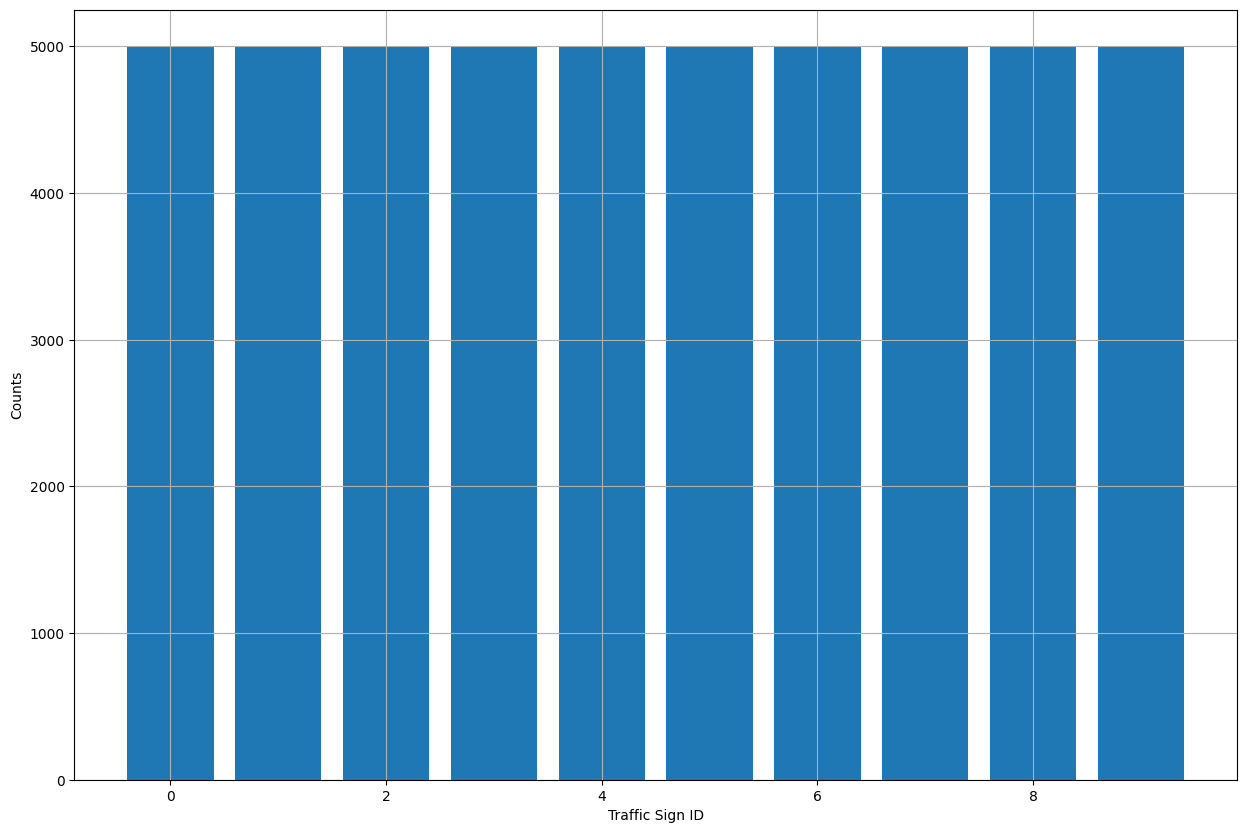

In [29]:
# Compute the class histogram
from collections import Counter
hist = Counter(y_train.flatten().tolist())

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

plt.show()

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [30]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [33]:
# Build the classifier
inputs = Input(shape=(32, 32, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

### Step 3: Training

Compile the model and train it.

In [48]:
epochs = 30
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print('Elapsed time', time() - start)

Epoch 1/30
352/352 [==============================] - 20s 56ms/step - loss: 0.8642 - accuracy: 0.7025 - val_loss: 0.9597 - val_accuracy: 0.6784
Epoch 2/30
352/352 [==============================] - 20s 56ms/step - loss: 0.8540 - accuracy: 0.7068 - val_loss: 0.9445 - val_accuracy: 0.6770
Epoch 3/30
352/352 [==============================] - 21s 59ms/step - loss: 0.8438 - accuracy: 0.7104 - val_loss: 0.9703 - val_accuracy: 0.6724
Epoch 4/30
352/352 [==============================] - 21s 60ms/step - loss: 0.8402 - accuracy: 0.7114 - val_loss: 0.9334 - val_accuracy: 0.6870
Epoch 5/30
352/352 [==============================] - 23s 64ms/step - loss: 0.8373 - accuracy: 0.7102 - val_loss: 0.9429 - val_accuracy: 0.6838
Epoch 6/30
352/352 [==============================] - 20s 58ms/step - loss: 0.8293 - accuracy: 0.7152 - val_loss: 0.9279 - val_accuracy: 0.6882
Epoch 7/30
352/352 [==============================] - 21s 59ms/step - loss: 0.8227 - accuracy: 0.7171 - val_loss: 0.9341 - val_accuracy:

Train Acc      0.7504000067710876
Validation Acc 0.7035999894142151


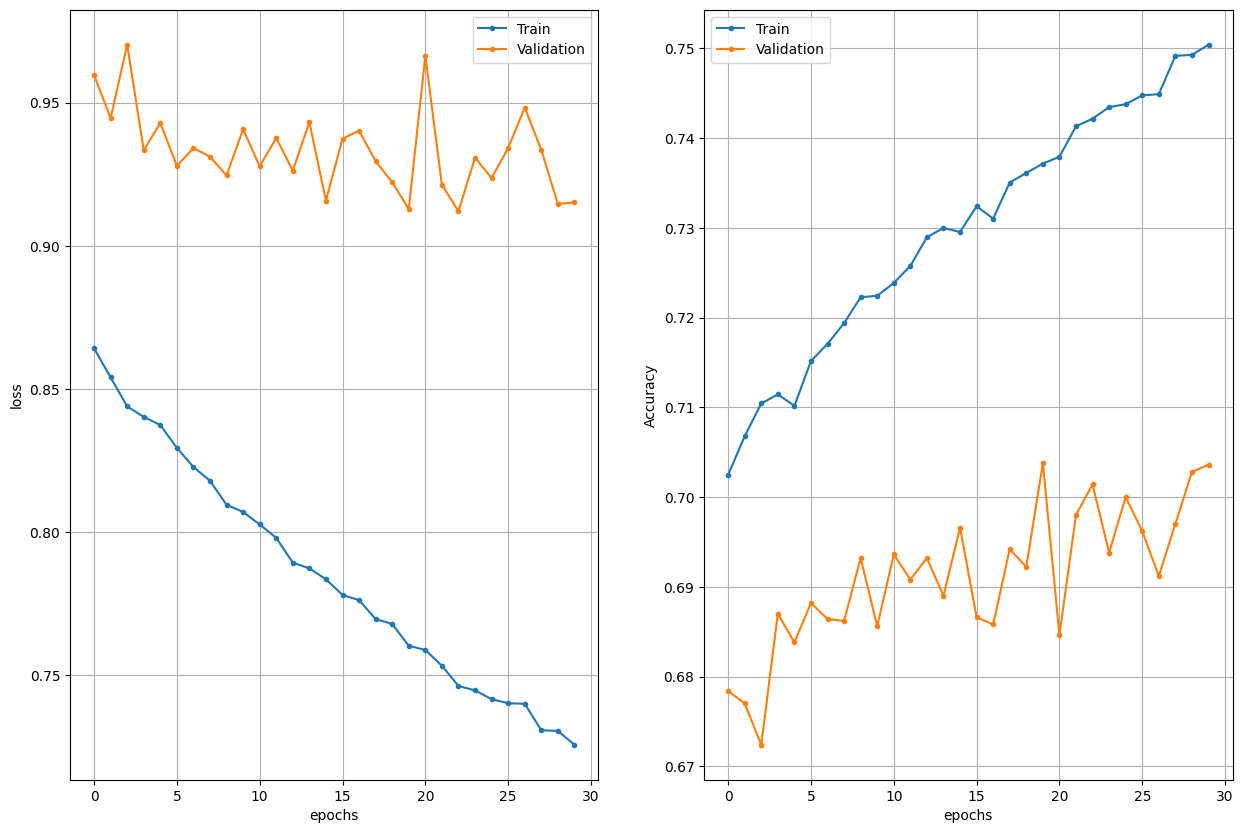

In [49]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [44]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 [==============================] - 2s 6ms/step
True [3 8 8 0 6]
Pred [3 8 8 0 6]
Pred [[4.6413796e-04 5.0876821e-05 2.0591825e-02 8.4663850e-01 1.4578950e-03
  8.3059065e-02 3.1929176e-02 2.1424028e-04 1.5158394e-02 4.3579986e-04]
 [2.9063817e-02 2.2770791e-01 1.4715412e-05 1.5540210e-06 1.3889197e-05
  1.1306643e-07 4.9461953e-08 1.5028807e-05 7.4057114e-01 2.6117321e-03]
 [3.4052610e-01 2.1746397e-01 2.1049351e-02 1.1870532e-02 2.6525098e-03
  2.1227638e-03 1.1163750e-03 3.3850460e-03 3.5056600e-01 4.9247358e-02]
 [7.5114095e-01 1.2715103e-01 3.0661231e-02 4.2543039e-03 3.2920928e-03
  3.7055950e-05 2.0549351e-03 2.5307455e-03 6.7933209e-02 1.0944358e-02]
 [9.1146620e-05 1.7141229e-04 3.0778179e-02 4.4457078e-02 3.3539709e-01
  5.8174613e-03 5.8295524e-01 1.0586738e-05 2.6052169e-04 6.1286570e-05]]
(10000, 10)


In [45]:
# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)

for class_id, class_name in classes.items():
    mask = y_true == class_id
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    acc = tp / total
    print(class_name, acc)

plane 0.726
car 0.803
bird 0.631
cat 0.541
deer 0.527
dog 0.535
frog 0.726
horse 0.722
ship 0.697
truck 0.693


In [46]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.9863 - accuracy: 0.6601
Test loss   0.9862724542617798
Test metric 0.660099983215332


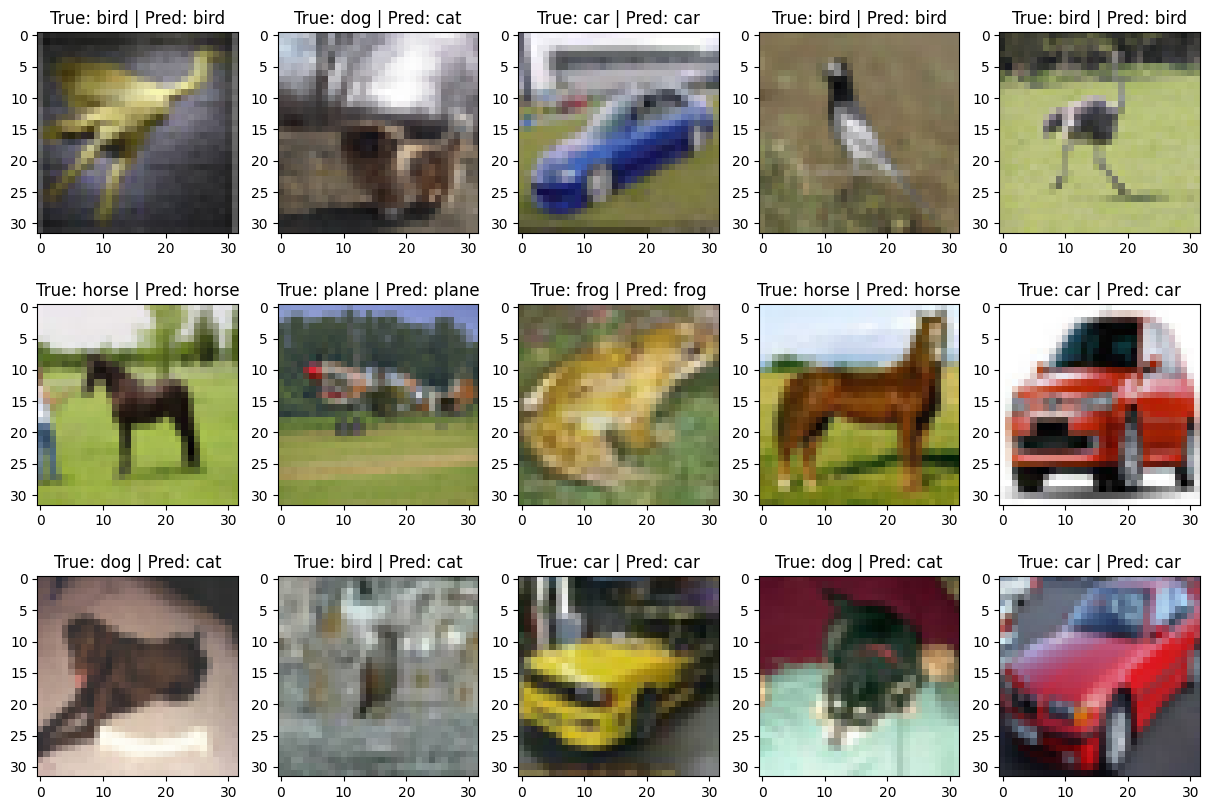

In [47]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?

**Approximate overall accurancy is 0.67**

* What modifications would you do in order to improve the classification accuracy?

**The first thing it's incresing count of epochs. After that take a look on result. If the result is unsatisfactory then to do more complex model (more layers or/and filters)**

* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

**One modification - increasing epochs from 25 to 30:) The accuracy was improved a little bit, from 0.67 to 0.7.**